In [1]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

In [2]:
os.getcwd()

'C:\\Users\\USER\\Downloads'

In [3]:
df = pd.read_csv("ElectionData.csv")

In [4]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [5]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [7]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


In [11]:
cat=["economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge"]

In [12]:
for i in cat:
    df[i]=df[i].astype("object")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   object
 3   economic.cond.household  1517 non-null   object
 4   Blair                    1517 non-null   object
 5   Hague                    1517 non-null   object
 6   Europe                   1517 non-null   object
 7   political.knowledge      1517 non-null   object
 8   gender                   1517 non-null   object
dtypes: int64(1), object(8)
memory usage: 118.5+ KB


In [14]:
df.describe(include = 'all')

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1517,1517.000000,1517.0,1517.0,1517.0,1517.0,1517.0,1517.0,1517
unique,2,NaN,5.0,5.0,5.0,5.0,11.0,4.0,2
top,Labour,NaN,3.0,3.0,4.0,2.0,11.0,2.0,female
freq,1057,NaN,604.0,645.0,833.0,617.0,338.0,776.0,808
mean,NaN,54.241266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,15.701741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    256
4    538
3    604
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    435
3    645
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    152
2    434
4    833
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    557
2    617
Name: Hague, dtype: int64


EUROPE :  11
2      77
7      86
10    101
1     109
9     111
8     111
5     123
4     126
3     128
6     207
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    249
0    454
2    776
Name: political.knowledge, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




In [16]:
df['vote'].value_counts(normalize = True)
     

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

In [17]:
df['gender'].value_counts(normalize = True)
     

female    0.53263
male      0.46737
Name: gender, dtype: float64

In [18]:
s = 0.53263-0.46737

In [19]:
s

0.06526000000000004

In [20]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [21]:
df.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

## Univariate Analysis

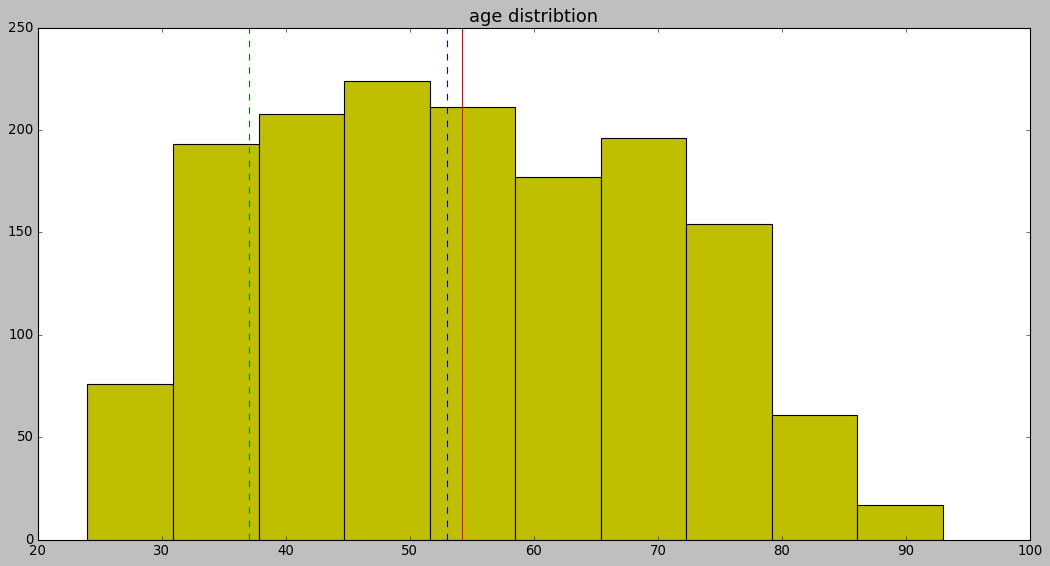

In [22]:
plt.figure(figsize=(16,8))
plt.title('age distribtion',fontsize=16)
plt.hist(df['age'], color='y') 
plt.axvline(df['age'].mean(), color='r', linewidth=1)
plt.axvline(df['age'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['age'].mode()[0], color='g', linestyle='dashed', linewidth=1)

Text(0.5, 1.0, 'vote')

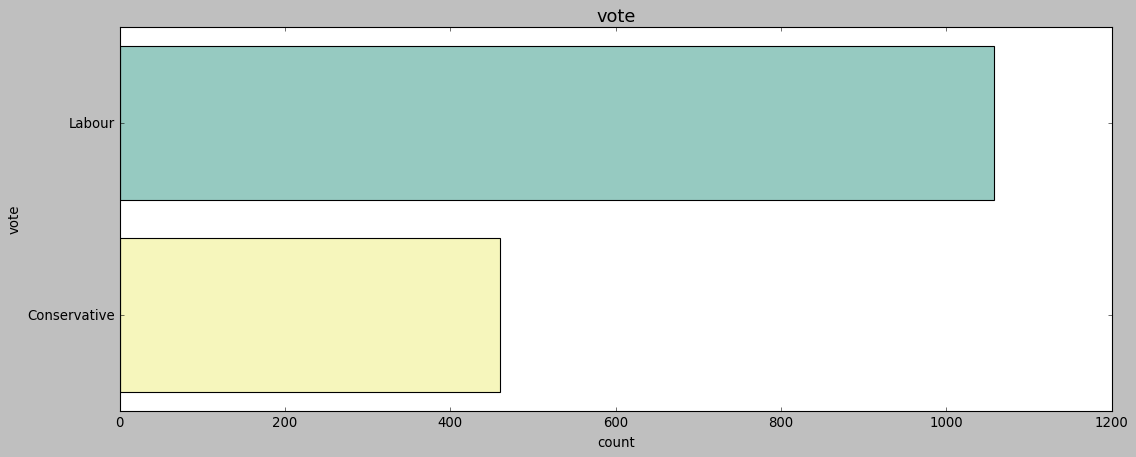

In [23]:
plt.figure(figsize=(16,6))
sns.countplot(y=(df.vote),palette='Set3');
plt.title('vote',fontsize=16)

Text(0.5, 1.0, 'gender')

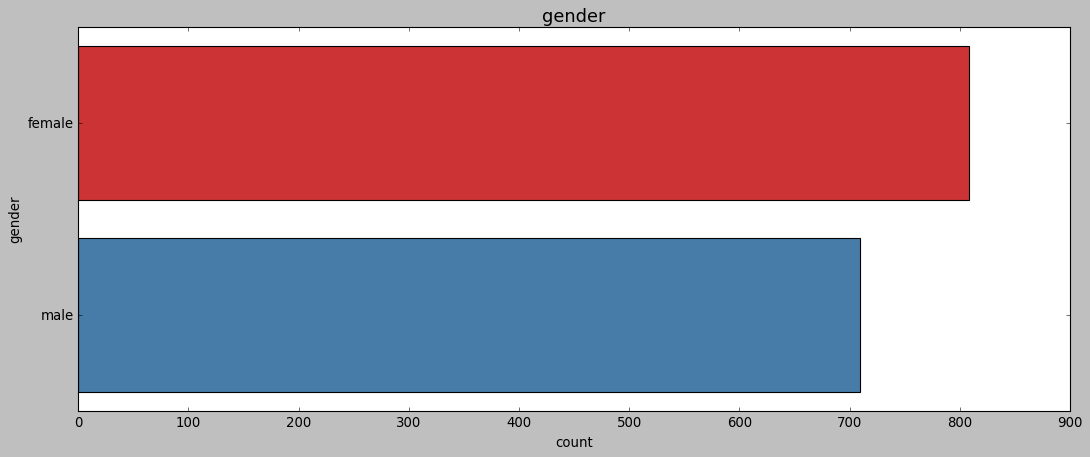

In [24]:
plt.figure(figsize=(16,6))
sns.countplot(y=(df.gender),palette='Set1');
plt.title('gender',fontsize=16)

Text(0.5, 1.0, 'political.knowledge')

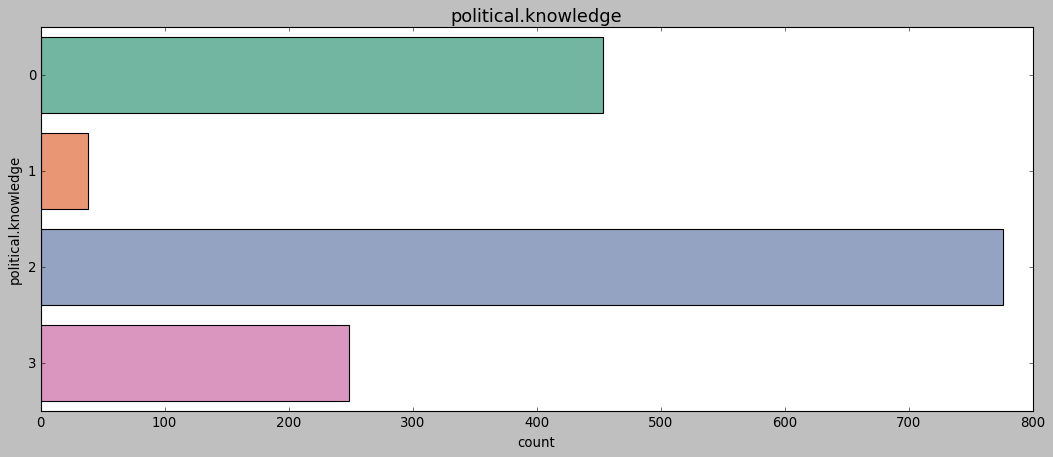

In [25]:
plt.figure(figsize=(16,6))
sns.countplot(y=(df['political.knowledge']),palette='Set2');
plt.title('political.knowledge',fontsize=16)

Text(0.5, 1.0, 'economic.cond.national')

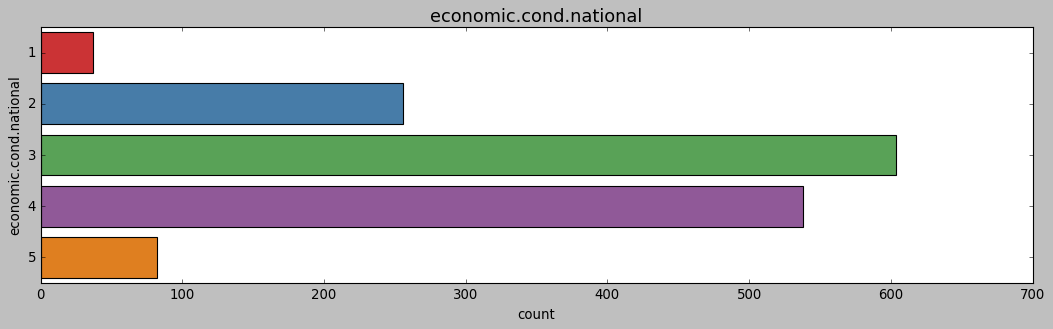

In [26]:
plt.figure(figsize=(16,4))
sns.countplot(y=(df['economic.cond.national']),palette='Set1');
plt.title('economic.cond.national',fontsize=16)

Text(0.5, 1.0, 'economic.cond.household')

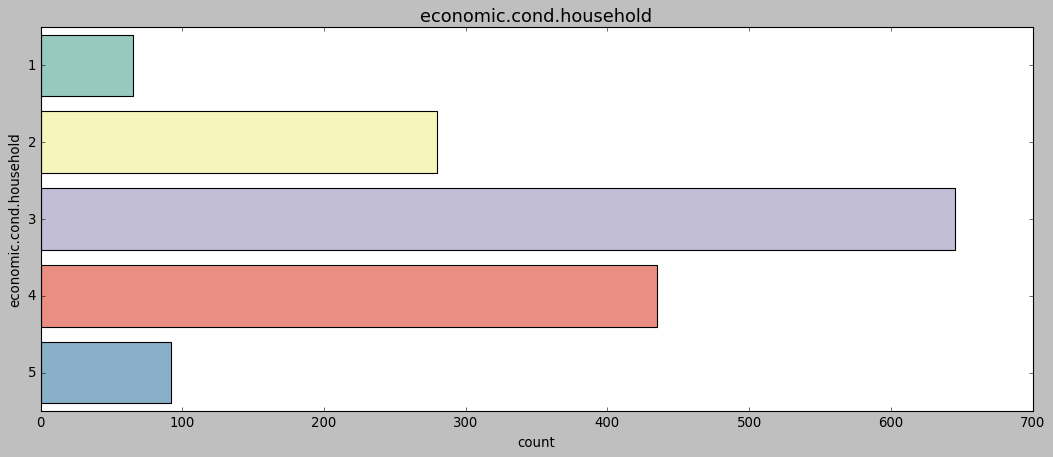

In [27]:
plt.figure(figsize=(16,6))
sns.countplot(y=(df['economic.cond.household']),palette='Set3');
plt.title('economic.cond.household',fontsize=16)

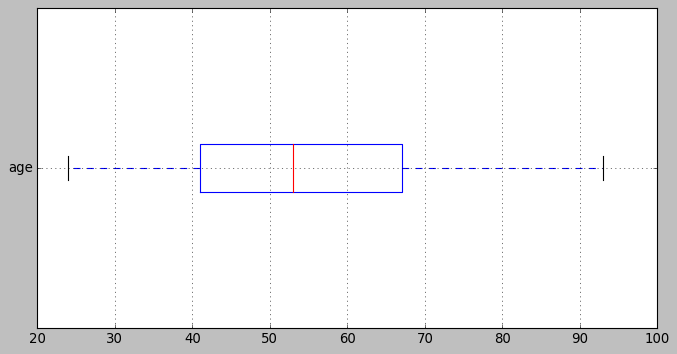

In [28]:
plt.figure(figsize=(10,5))
df.boxplot(vert=0)
plt.show()

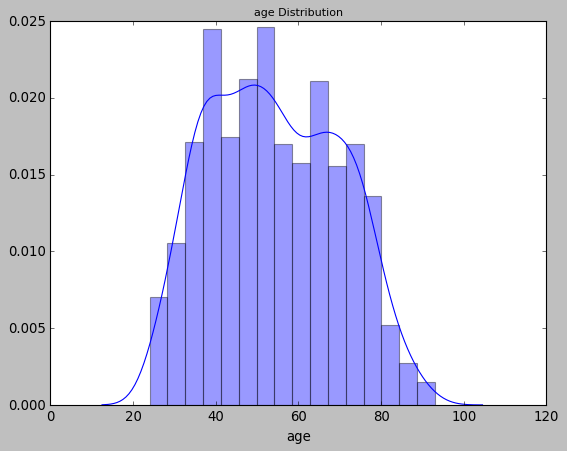

In [34]:

a = sns.distplot(df['age'])
a.set_title("age Distribution",fontsize=10)
plt.show()

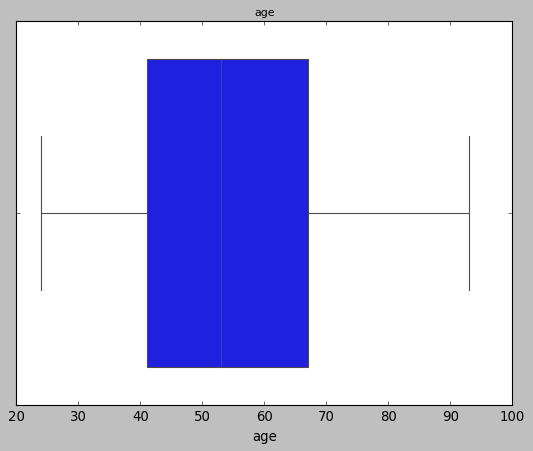

In [36]:

a = sns.boxplot(df['age'])
a.set_title("age",fontsize=10)
plt.show()

## Bivariate and Multivariate Analysis

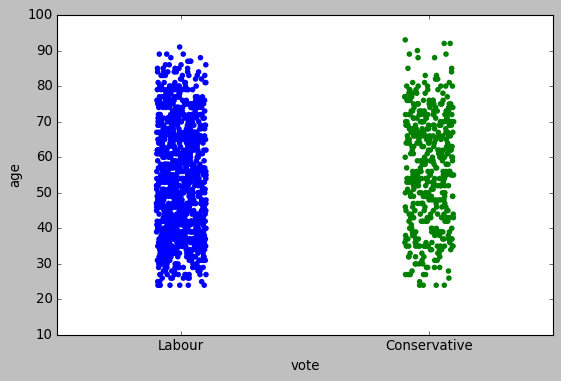

In [37]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['age'], jitter=True) 
plt.show()

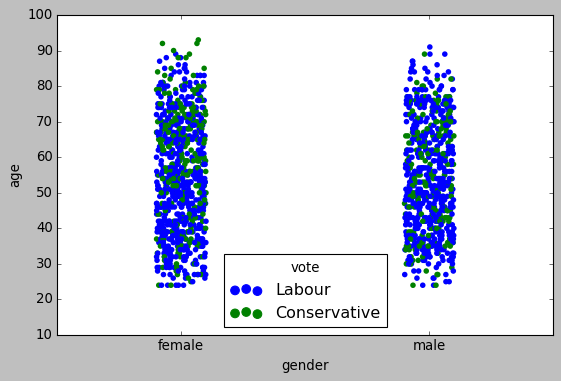

In [38]:
plt.figure(figsize=(8,5))
sns.stripplot(df["gender"], df['age'], hue = df['vote'], jitter=True) 
plt.show()

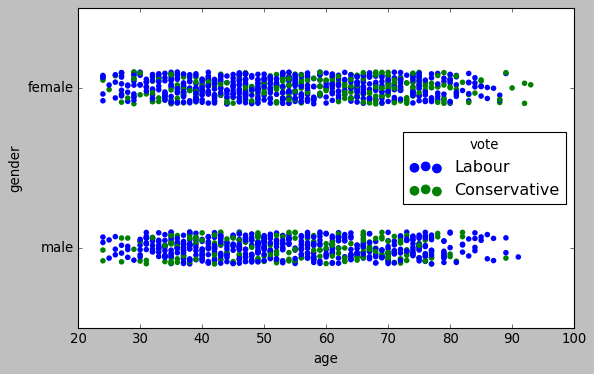

In [39]:
plt.figure(figsize=(8,5))
sns.stripplot(df["age"], df['gender'],hue = df['vote'] ,jitter=True) 
plt.show()

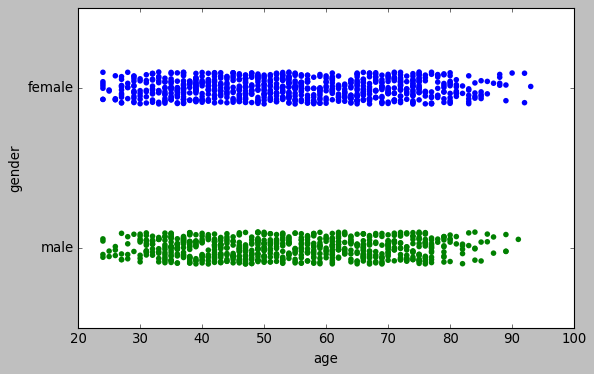

In [40]:
plt.figure(figsize=(8,5))
sns.stripplot(df["age"], df['gender'],jitter=True) 
plt.show()

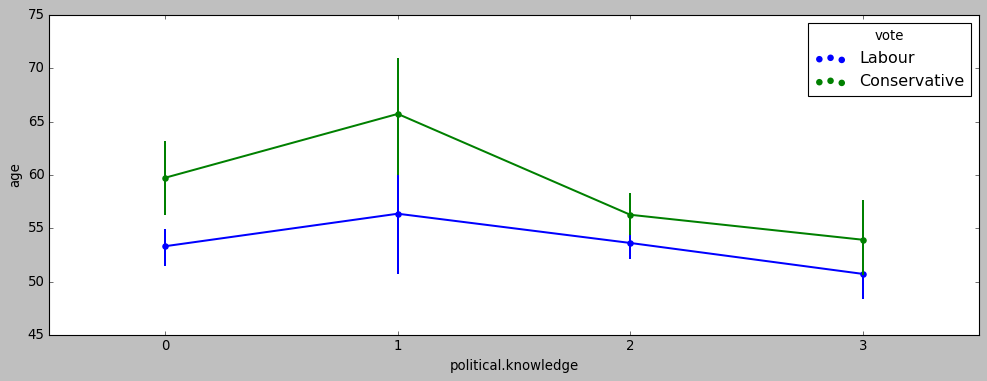

In [41]:
plt.figure(figsize=(15,5))

sns.pointplot(x="political.knowledge", y="age", hue = 'vote',  data=df)
plt.show()

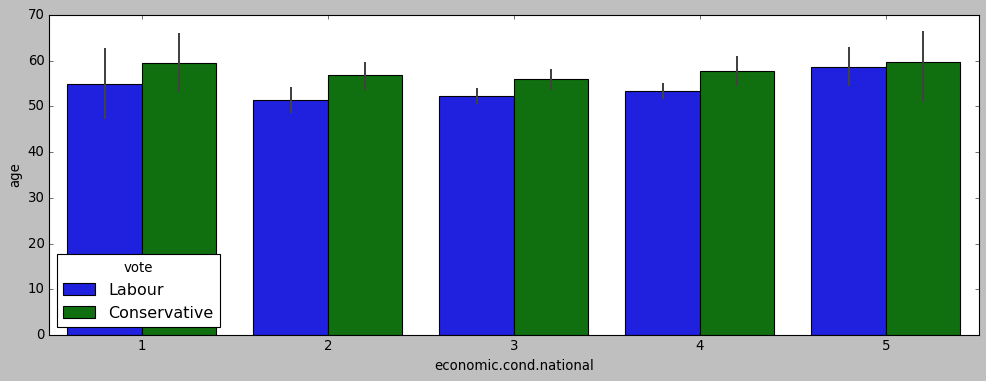

In [42]:
plt.figure(figsize=(15,5))

sns.barplot(x="economic.cond.national", y="age", hue = 'vote',  data=df)
plt.show()

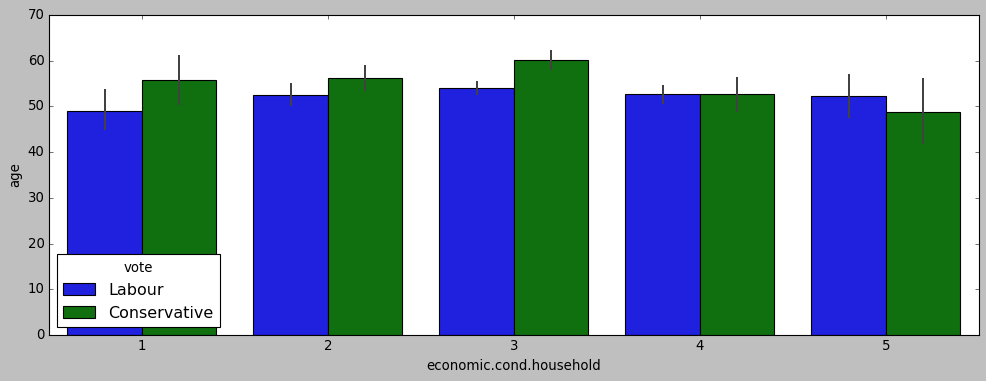

In [43]:
plt.figure(figsize=(15,5))

sns.barplot(x="economic.cond.household", y="age", hue = 'vote',  data=df)
plt.show()

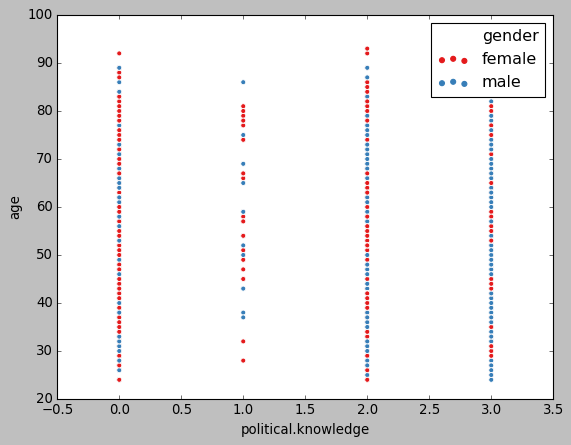

<Figure size 6400x1600 with 0 Axes>

In [44]:
sns.scatterplot(df['political.knowledge'], df['age'], hue=df['gender'],palette='Set1') 
fig=plt.figure(figsize=(80,20))

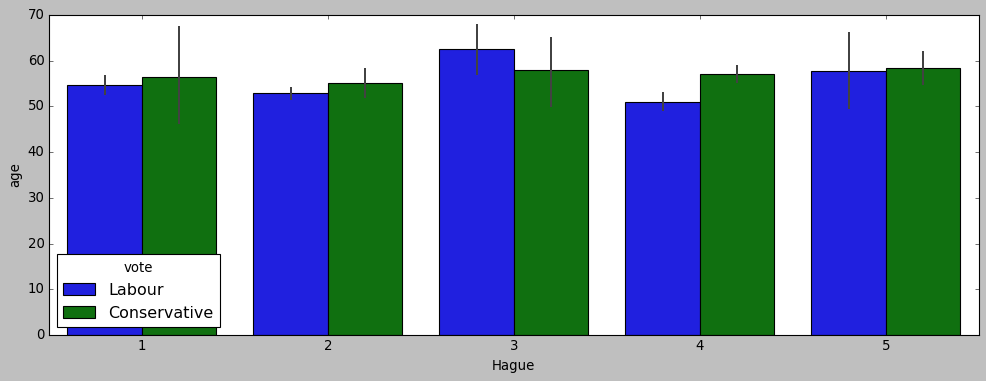

In [175]:
plt.figure(figsize=(15,5))

sns.barplot(x="Hague", y="age", hue = 'vote',  data=df)
plt.show()

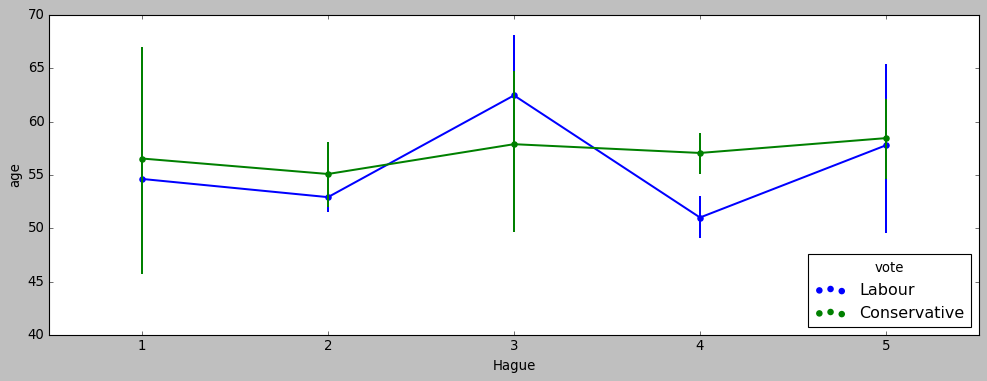

In [179]:
plt.figure(figsize=(15,5))

sns.pointplot(x="Hague", y="age", hue = 'vote',  data=df)
plt.show()

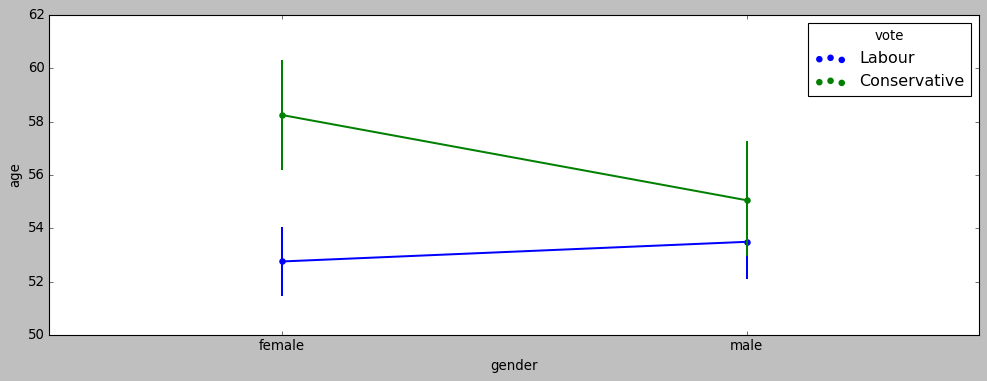

In [180]:
plt.figure(figsize=(15,5))

sns.pointplot(x="gender", y="age", hue = 'vote',  data=df)
plt.show()

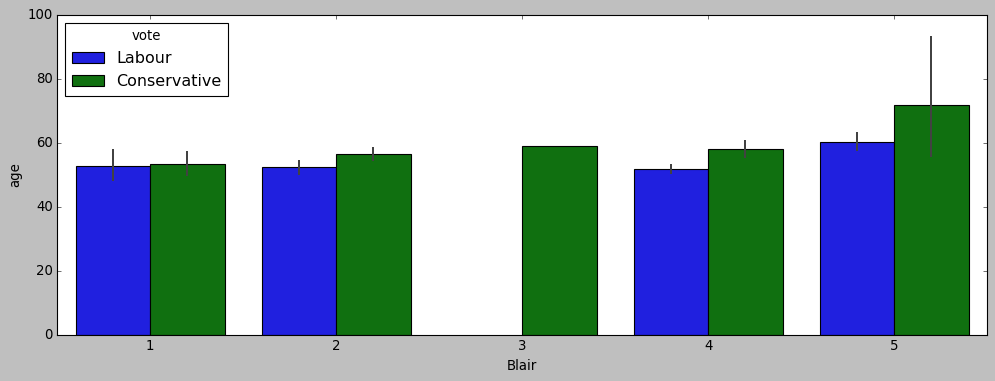

In [178]:
plt.figure(figsize=(15,5))

sns.barplot(x="Blair", y="age", hue = 'vote',  data=df)
plt.show()

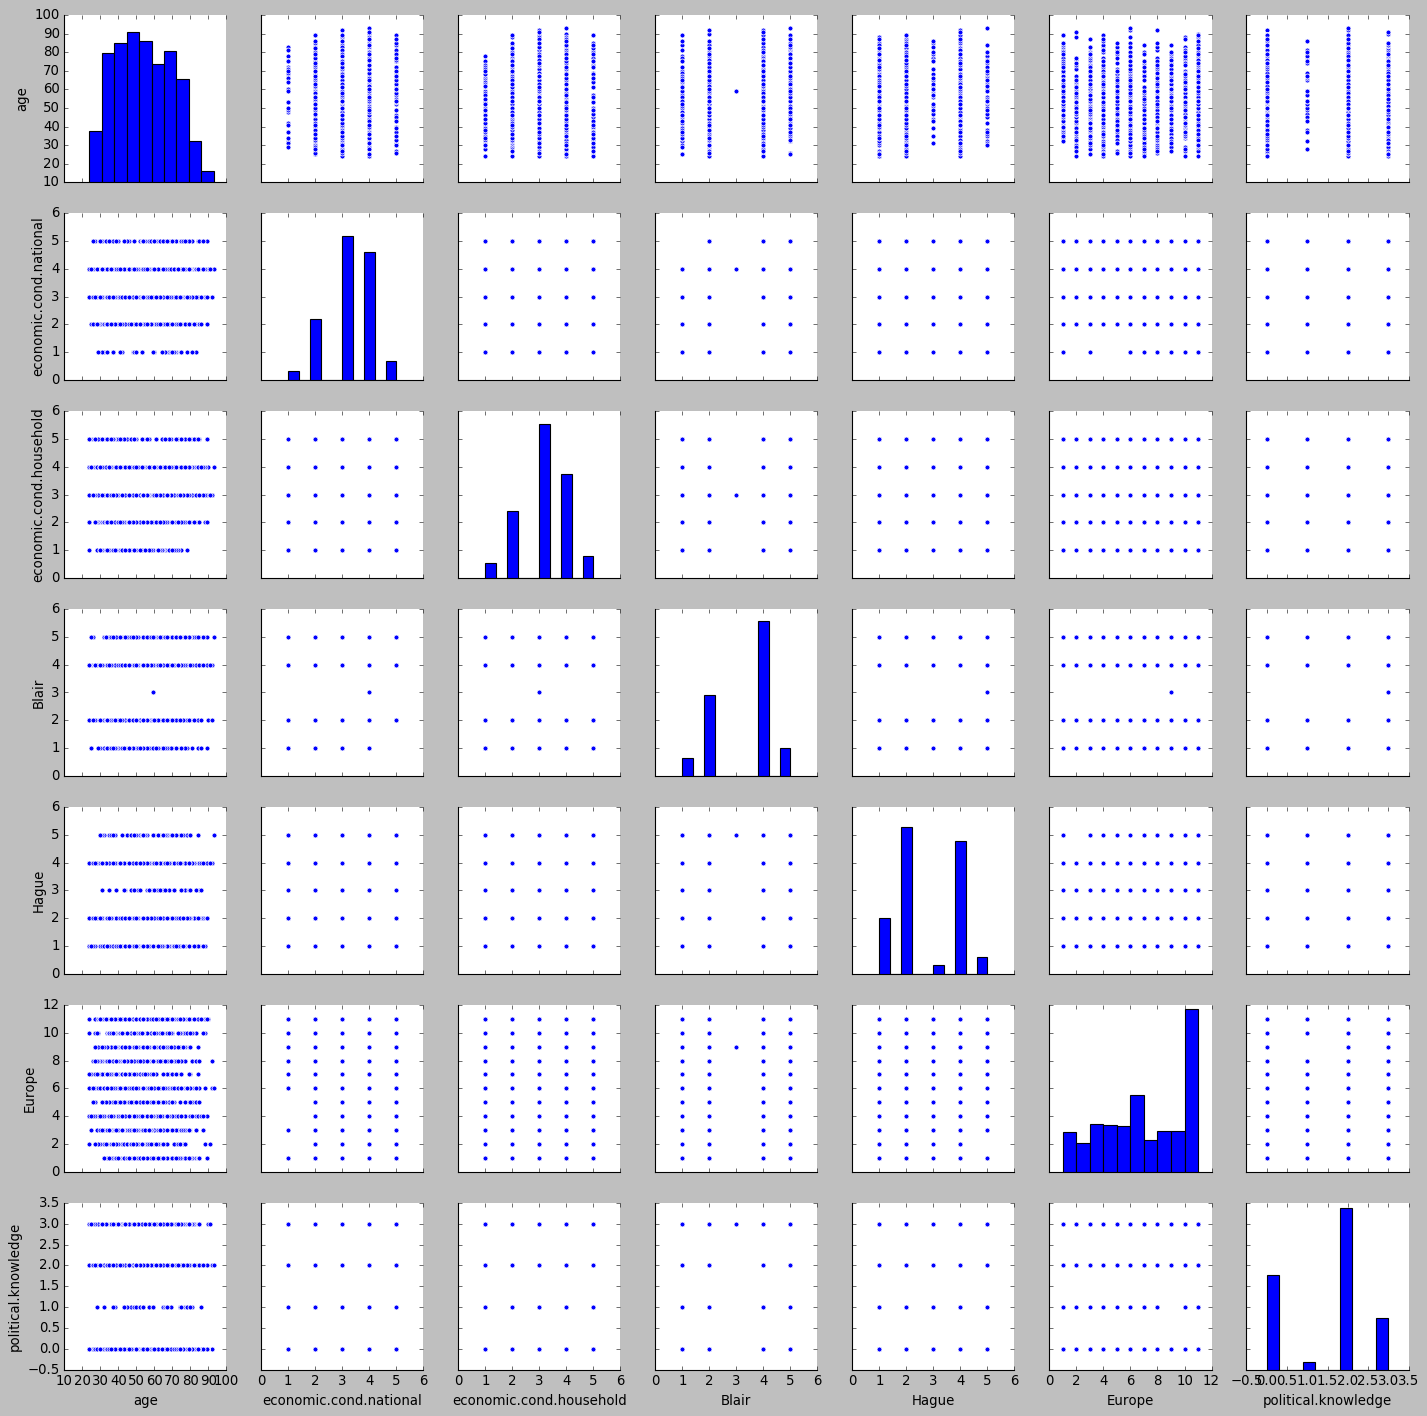

In [45]:
sns.pairplot(df)

In [52]:
data_new = df.copy()

In [53]:
data_new

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


In [54]:
data_new.select_dtypes(include='object').head()

,vote,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,3,3,4,1,2,2,female
1,Labour,4,4,4,4,5,2,male
2,Labour,4,4,5,2,3,2,male
3,Labour,4,2,2,1,4,0,female
4,Labour,2,2,1,1,6,2,male


In [55]:
for feature in data_new.columns: 
    if data_new[feature].dtype == 'object':
        data_new[feature] = pd.Categorical(data_new[feature]).codes

In [56]:
data_new.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,2,2,3,0,1,2,0
1,1,36,3,3,3,3,4,2,1
2,1,35,3,3,4,1,2,2,1
3,1,24,3,1,1,0,3,0,0
4,1,41,1,1,0,0,5,2,1


In [57]:
data_new.dtypes

vote                        int8
age                        int64
economic.cond.national      int8
economic.cond.household     int8
Blair                       int8
Hague                       int8
Europe                      int8
political.knowledge         int8
gender                      int8
dtype: object

In [58]:
data_df = data_new.drop('vote',axis=1)

In [59]:
from scipy.stats import zscore
data_fin=data_df.apply(zscore)
data_fin.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1.067536


### Train-Test Split

In [60]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [62]:
x = data_fin
y = data_new['vote']

In [63]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [64]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: vote, dtype: int8

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=1)

In [66]:
x_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
991,-1.289535,-1.412613,0.926367,-1.988727,1.014951,1.291625,0.423832,-0.936736
1274,-0.907286,0.856242,-0.148020,0.565802,1.014951,-0.224465,-1.421084,1.067536
649,0.430587,0.856242,-0.148020,0.565802,1.014951,0.078753,0.423832,-0.936736
677,-0.461328,-0.278185,-0.148020,0.565802,-0.608329,1.291625,-1.421084,1.067536
538,-0.652453,1.990670,-0.148020,0.565802,-0.608329,0.381971,-1.421084,1.067536


In [67]:
y_train.head()

991     0
1274    1
649     0
677     1
538     1
Name: vote, dtype: int8

In [68]:
x_test.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
504,1.067669,-0.278185,-0.148020,-1.137217,-0.608329,0.381971,0.423832,-0.936736
369,-0.716161,-0.278185,-1.222408,0.565802,-0.608329,0.381971,1.346290,1.067536
1075,2.214417,1.990670,2.000755,1.417312,-0.608329,-1.740556,0.423832,1.067536
1031,-0.461328,-1.412613,-0.148020,-1.137217,1.014951,0.381971,0.423832,-0.936736
1329,-1.353243,1.990670,0.926367,0.565802,1.014951,0.381971,-1.421084,1.067536


In [69]:
y_test.head()

504     1
369     1
1075    1
1031    0
1329    1
Name: vote, dtype: int8

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

## LogisticRegression

In [72]:
log_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
log_model.fit(x_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [73]:
ytrain_predict_log = log_model.predict(x_train)
ytest_predict_log = log_model.predict(x_test)

## Log Regg Training Data

In [91]:
log_model.score(x_train, y_train)

0.8312912346842601

In [75]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

AUC: 0.890


Text(0.5, 1.0, 'Log Reg - Train Data')

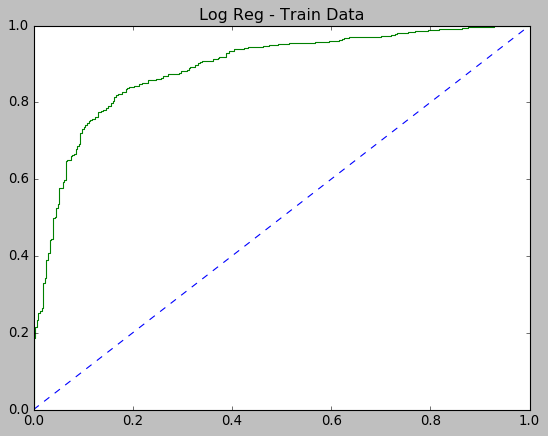

In [76]:
# predict probabilities
probs = log_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
log_train_fpr, log_train_tpr, log_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr)
plt.title('Log Reg - Train Data')

## Log Reg Test Data

In [77]:
log_model.score(x_test, y_test)

0.8355263157894737

AUC: 0.890


Text(0.5, 1.0, 'Log Reg - Test Data')

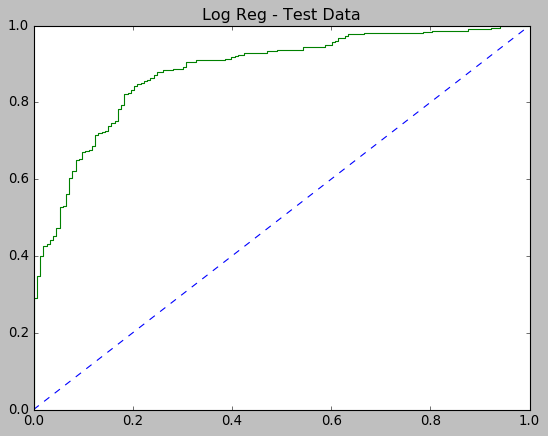

In [78]:
# predict probabilities
probs = log_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
log_test_fpr, log_test_tpr, log_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr)
plt.title('Log Reg - Test Data')

In [79]:
confusion_matrix(y_train, ytrain_predict_log)

array([[196, 111],
       [ 68, 686]], dtype=int64)

Text(0.5, 1.0, 'Train Data Log Reg')

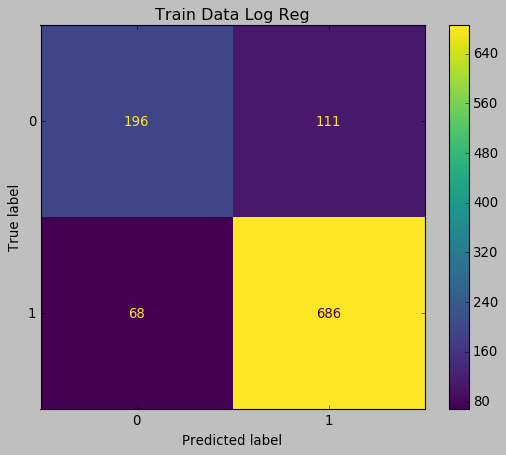

In [80]:
plot_confusion_matrix(log_model,x_train,y_train);
plt.title('Train Data Log Reg')

Text(0.5, 1.0, 'Test Data Log Reg')

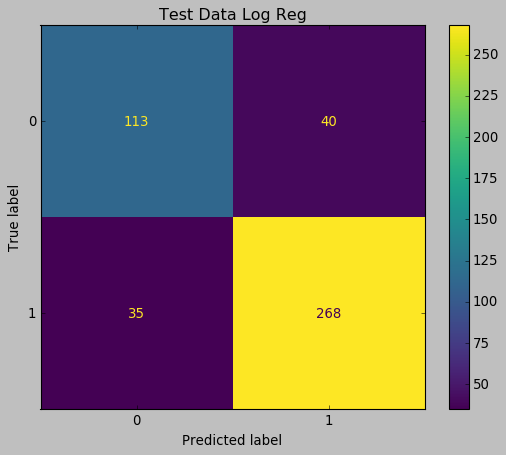

In [84]:
plot_confusion_matrix(log_model,x_test,y_test);
plt.title('Test Data Log Reg')

In [106]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_log),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_log),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456
 



## LinearDiscriminantAnalysis

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [87]:
clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(x_train, y_train)

In [88]:
ytrain_predict_lda = lda_model.predict(x_train)
ytest_predict_lda = lda_model.predict(x_test)

## LDA Train Data

In [89]:
lda_model.score(x_train, y_train)

0.8341187558906692

AUC: 0.889


Text(0.5, 1.0, 'LDA  - Train Data')

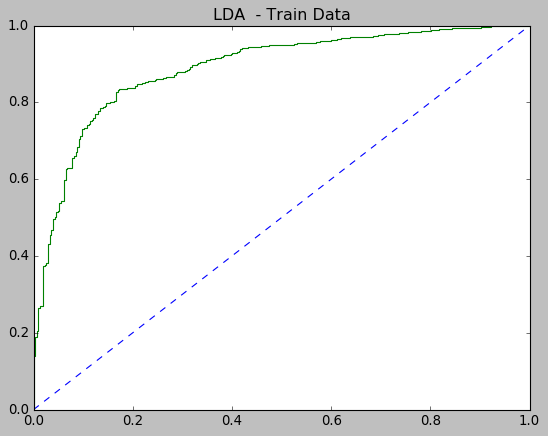

In [104]:
# predict probabilities
probs = lda_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)
plt.title('LDA  - Train Data')

Text(0.5, 1.0, 'Train Data LDA')

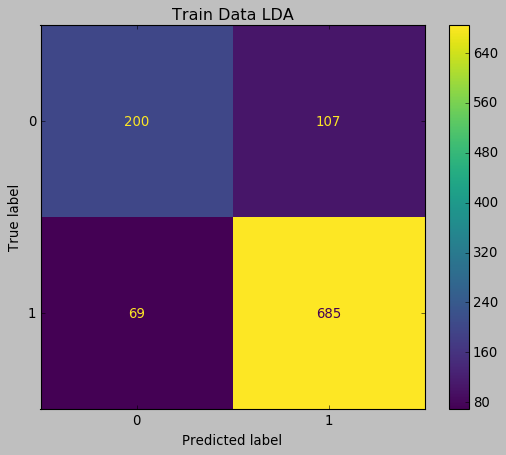

In [102]:
plot_confusion_matrix(lda_model,x_train,y_train);
plt.title('Train Data LDA')

## LDA Test Data

In [94]:
lda_model.score(x_test, y_test)

0.8333333333333334

AUC: 0.888


Text(0.5, 1.0, 'LDA - Test Data')

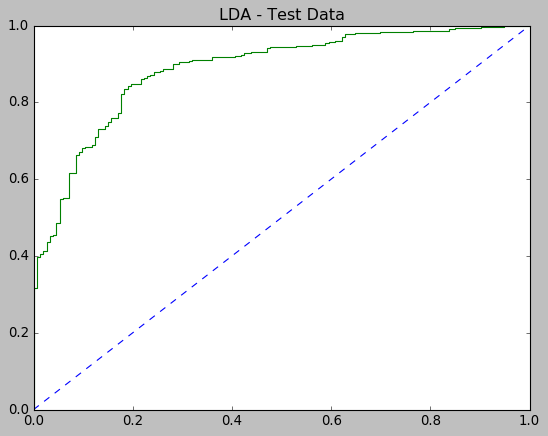

In [103]:
# predict probabilities
probs = lda_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)
plt.title('LDA - Test Data')

Text(0.5, 1.0, 'Test Data LDA')

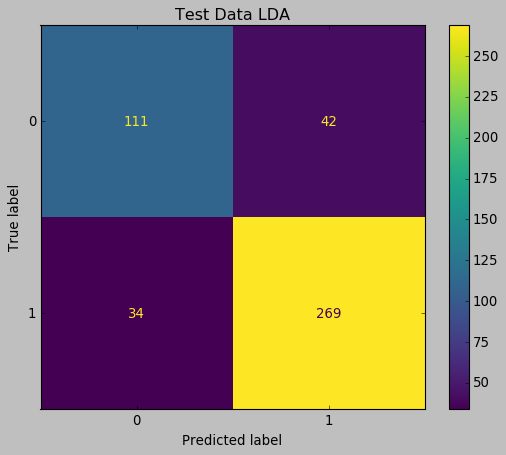

In [105]:
plot_confusion_matrix(lda_model,x_test,y_test);
plt.title('Test Data LDA')

In [96]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_lda),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_lda),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [100]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, log_model.coef_[0][idx]))

The coefficient for age is -0.23541759961490158
The coefficient for economic.cond.national is 0.5620327056282469
The coefficient for economic.cond.household is 0.05699068559850641
The coefficient for Blair is 0.710025879233481
The coefficient for Hague is -1.0219410257175439
The coefficient for Europe is -0.6984592770125304
The coefficient for political.knowledge is -0.3525771010165865
The coefficient for gender is 0.09934857345390612


## KNN Model

In [108]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [109]:
ytrain_predict_knn = knn_model.predict(x_train)
ytest_predict_knn = knn_model.predict(x_test)

## KNN Train Data

In [123]:
knn_model.score(x_train, y_train)

0.8557964184731386

AUC: 0.927


Text(0.5, 1.0, 'KNN  - Train Data')

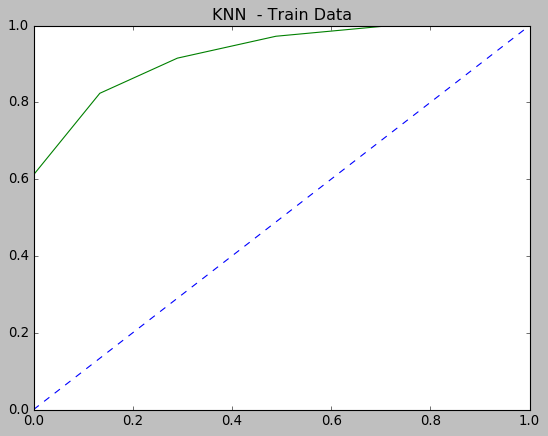

In [124]:
# predict probabilities
probs = knn_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr)
plt.title('KNN  - Train Data')

Text(0.5, 1.0, 'Train Data KNN')

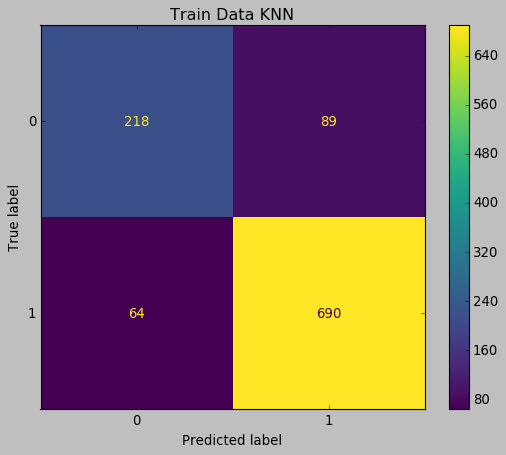

In [125]:
plot_confusion_matrix(knn_model,x_train,y_train);
plt.title('Train Data KNN')

## KNN Test Data

In [126]:
knn_model.score(x_test, y_test)

0.8245614035087719

AUC: 0.870


Text(0.5, 1.0, 'KNN - Test Data')

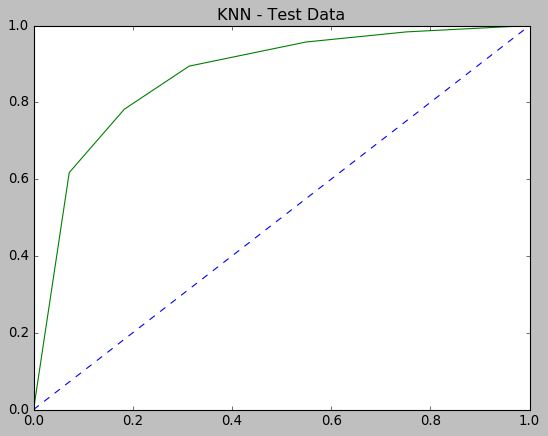

In [127]:
# predict probabilities
probs = knn_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr)
plt.title('KNN - Test Data')

Text(0.5, 1.0, 'Test Data KNN')

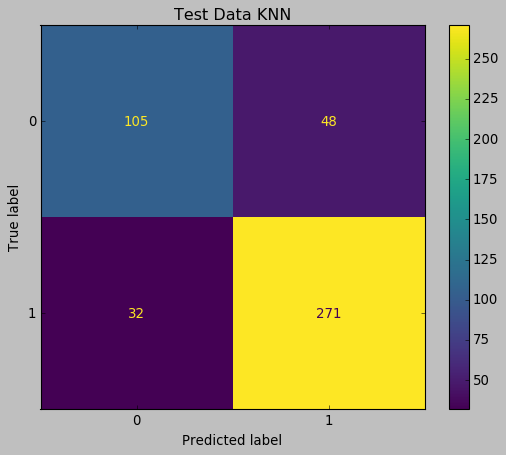

In [128]:
plot_confusion_matrix(knn_model,x_test,y_test);
plt.title('Test Data KNN')

In [129]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_knn),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_knn),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.77      0.71      0.74       307
           1       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.69      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456
 



## Naïve Bayes Model 

In [130]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [131]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [132]:
ytrain_predict_nb = nb_model.predict(x_train)
ytest_predict_nb = nb_model.predict(x_test)

## NB Train Data

In [133]:
nb_model.score(x_train, y_train)

0.8350612629594723

AUC: 0.888


Text(0.5, 1.0, 'NB  - Train Data')

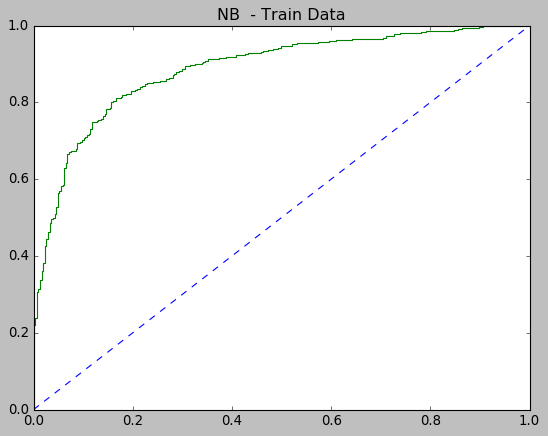

In [134]:
# predict probabilities
probs = nb_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % nb_train_auc)
# calculate roc curve
nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr)
plt.title('NB  - Train Data')

Text(0.5, 1.0, 'Train Data NB')

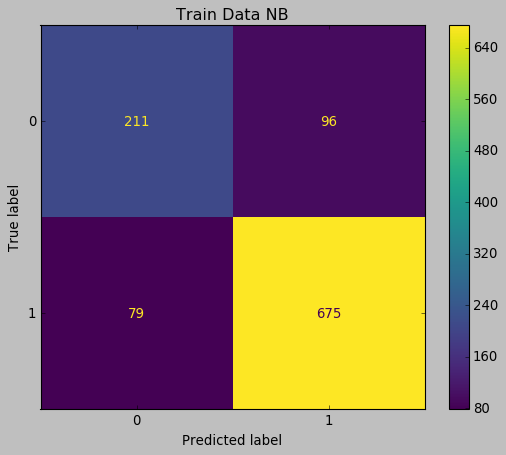

In [139]:
plot_confusion_matrix(nb_model,x_train,y_train);
plt.title('Train Data NB')

## NB Test Data

In [135]:
nb_model.score(x_test, y_test)

0.8223684210526315

AUC: 0.876


Text(0.5, 1.0, 'NB - Test Data')

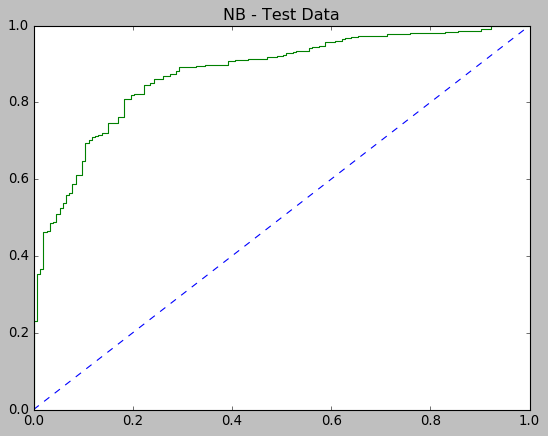

In [136]:
# predict probabilities
probs = nb_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % nb_test_auc)
# calculate roc curve
nb_test_fpr, nb_test_tpr, nb_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_test_fpr, nb_test_tpr)
plt.title('NB - Test Data')

Text(0.5, 1.0, 'Test Data NB')

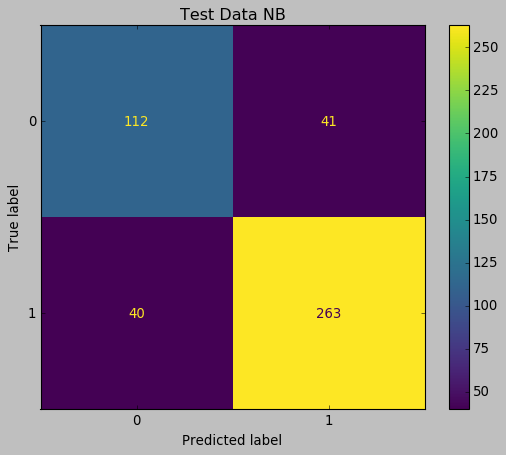

In [137]:
plot_confusion_matrix(nb_model,x_test,y_test);
plt.title('Test Data NB')

In [138]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_nb),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_nb),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



# Random Forest Classifier

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [144]:
param_grid = {
    'max_depth': [8,10],
    'max_features': [4,6],
    'min_samples_leaf': [30,90],
    'min_samples_split': [90,270],
    'n_estimators': [150,200]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [145]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [30, 90],
                         'min_samples_split': [90, 270],
                         'n_estimators': [150, 200]})

In [146]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 4,
 'min_samples_leaf': 30,
 'min_samples_split': 90,
 'n_estimators': 150}

In [148]:
rf_model = grid_search.best_estimator_
rf_model

RandomForestClassifier(max_depth=8, max_features=4, min_samples_leaf=30,
                       min_samples_split=90, n_estimators=150)

In [149]:
ytrain_predict_rf = rf_model.predict(x_train)
ytest_predict_rf = rf_model.predict(x_test)

## RF Train Data

In [150]:
rf_model.score(x_train, y_train)

0.8303487276154571

AUC: 0.899


Text(0.5, 1.0, 'RF  - Train Data')

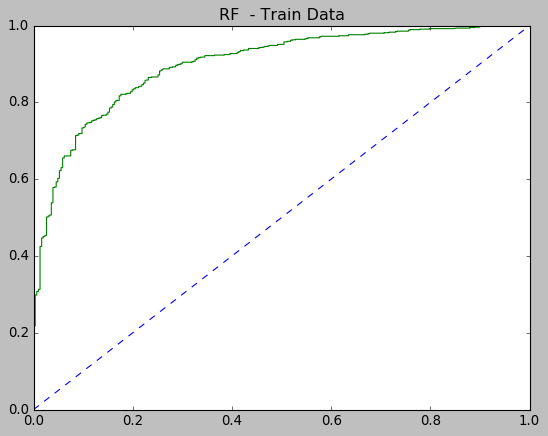

In [151]:
# predict probabilities
probs = rf_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr)
plt.title('RF  - Train Data')

Text(0.5, 1.0, 'Train Data RF')

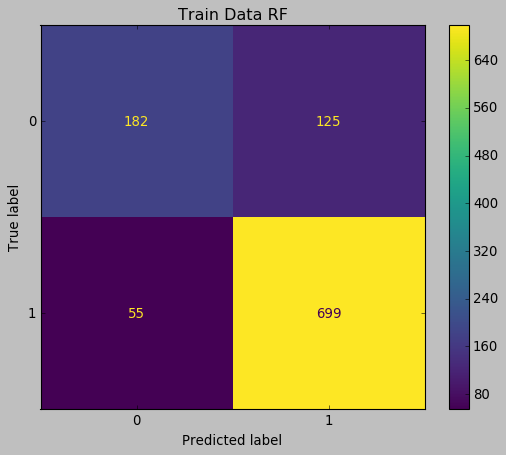

In [152]:
plot_confusion_matrix(rf_model,x_train,y_train);
plt.title('Train Data RF')

## RF Test Data

In [153]:
rf_model.score(x_test, y_test)

0.8135964912280702

AUC: 0.887


Text(0.5, 1.0, 'RF - Test Data')

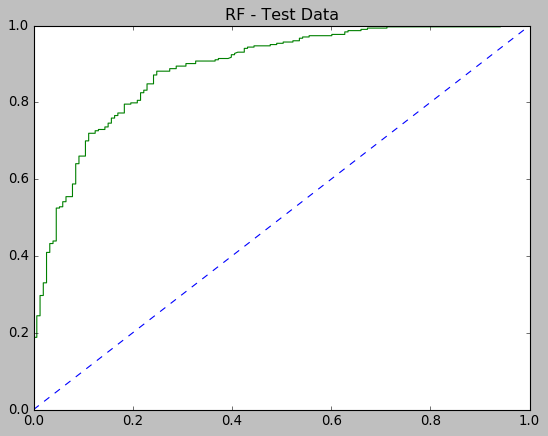

In [154]:
# predict probabilities
probs = rf_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
rf_test_fpr, rf_test_tpr, rf_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr)
plt.title('RF - Test Data')

Text(0.5, 1.0, 'Test Data RF')

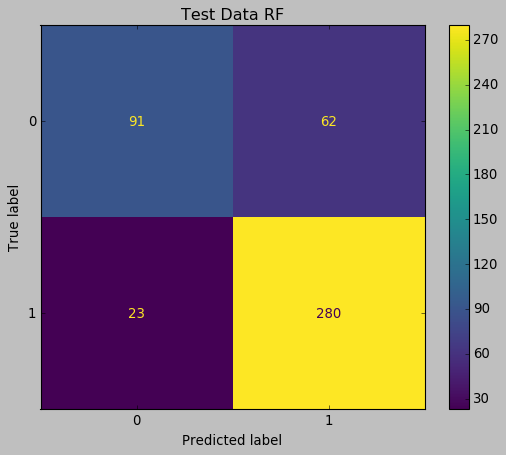

In [155]:
plot_confusion_matrix(rf_model,x_test,y_test);
plt.title('Test Data RF')

In [156]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_rf),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_rf),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.77      0.59      0.67       307
           1       0.85      0.93      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.76      0.78      1061
weighted avg       0.83      0.83      0.82      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.80      0.59      0.68       153
           1       0.82      0.92      0.87       303

    accuracy                           0.81       456
   macro avg       0.81      0.76      0.77       456
weighted avg       0.81      0.81      0.81       456
 



## Ada Boost

In [157]:
from sklearn.ensemble import AdaBoostClassifier


adb_model = AdaBoostClassifier(n_estimators=100,random_state=10)
adb_model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=10)

In [158]:
ytrain_predict_adb = adb_model.predict(x_train)
ytest_predict_adb = adb_model.predict(x_test)

## ADB Train Data

In [159]:
adb_model.score(x_train, y_train)

0.8501413760603205

AUC: 0.915


Text(0.5, 1.0, 'ADB  - Train Data')

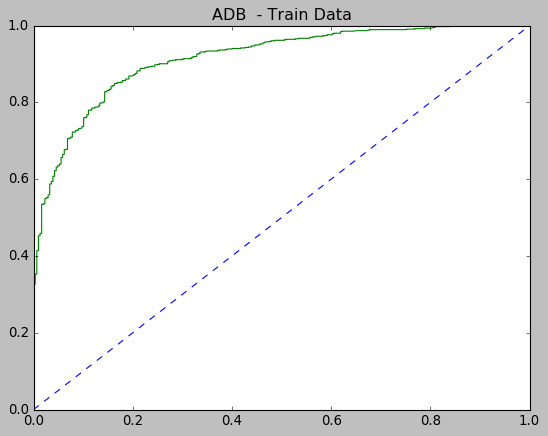

In [160]:
# predict probabilities
probs = adb_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % adb_train_auc)
# calculate roc curve
adb_train_fpr, adb_train_tpr, adb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_train_fpr, adb_train_tpr)
plt.title('ADB  - Train Data')

Text(0.5, 1.0, 'Train Data ADB')

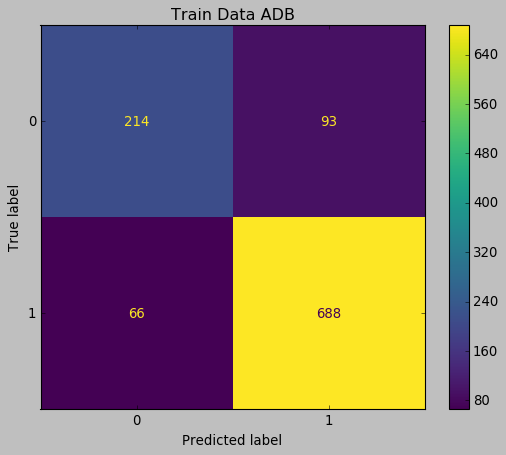

In [161]:
plot_confusion_matrix(adb_model,x_train,y_train);
plt.title('Train Data ADB')

## ADB Test Data

In [162]:
adb_model.score(x_test, y_test)

0.8135964912280702

AUC: 0.877


Text(0.5, 1.0, 'ADB - Test Data')

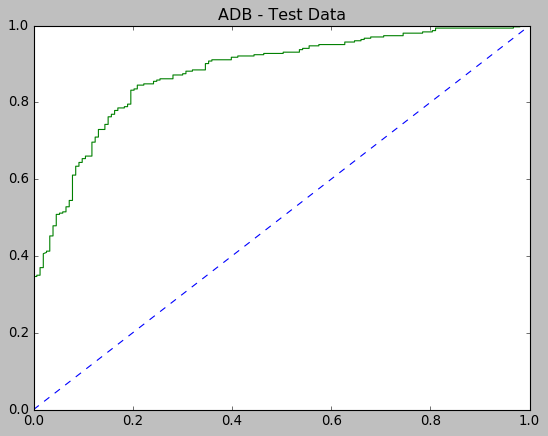

In [163]:
# predict probabilities
probs = adb_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % adb_test_auc)
# calculate roc curve
adb_test_fpr, adb_test_tpr, adb_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_test_fpr, adb_test_tpr)
plt.title('ADB - Test Data')

Text(0.5, 1.0, 'Test Data ADB')

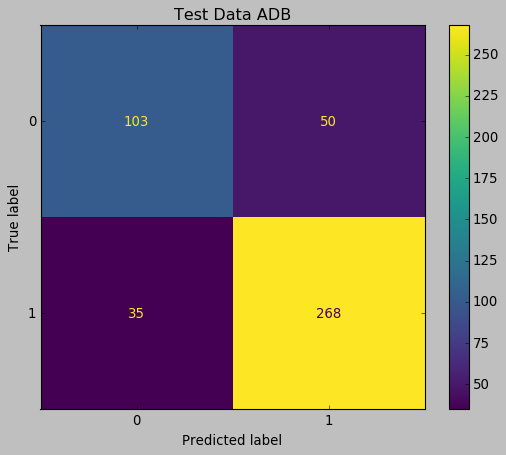

In [164]:
plot_confusion_matrix(adb_model,x_test,y_test);
plt.title('Test Data ADB')

In [165]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_adb),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_adb),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456
 



# ROC Curve for all the models on the Training data

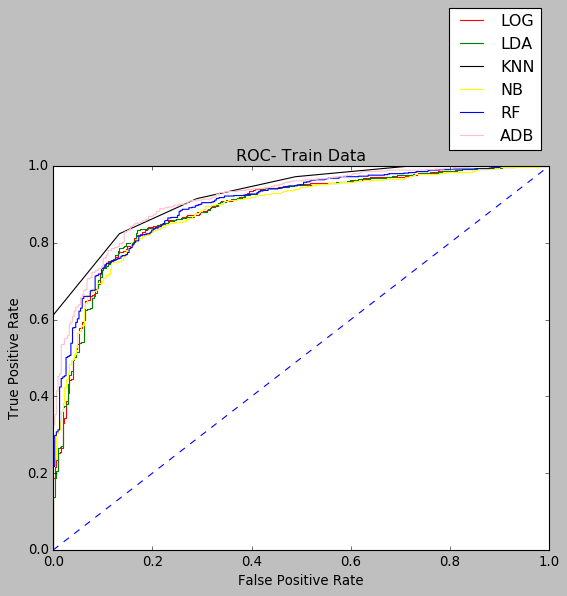

In [173]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_train_fpr,log_train_tpr,color='red',label="LOG")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.plot(knn_train_fpr,knn_train_tpr,color='black',label="KNN")
plt.plot(nb_train_fpr,nb_train_tpr,color='yellow',label="NB")
plt.plot(rf_train_fpr,rf_train_tpr,color='blue',label="RF")
plt.plot(adb_train_fpr,adb_train_tpr,color='pink',label="ADB")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC- Train Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# ROC Curve for all the models on the Testing data

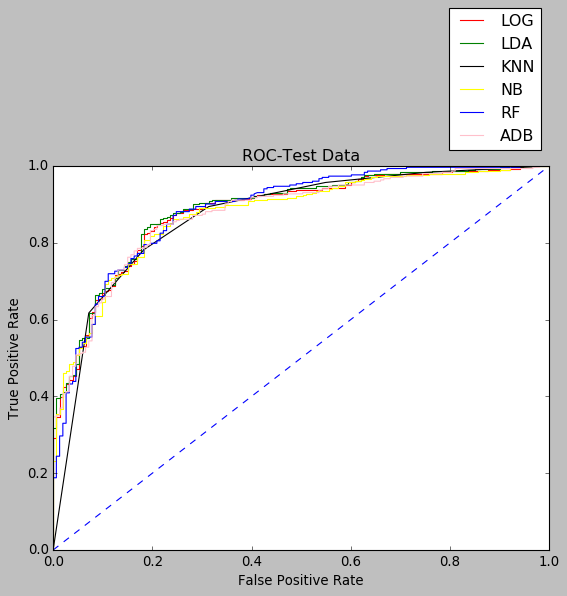

In [174]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_test_fpr,log_test_tpr,color='red',label="LOG")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.plot(knn_test_fpr,knn_test_tpr,color='black',label="KNN")
plt.plot(nb_test_fpr,nb_test_tpr,color='yellow',label="NB")
plt.plot(rf_test_fpr,rf_test_tpr,color='blue',label="RF")
plt.plot(adb_test_fpr,adb_test_tpr,color='pink',label="ADB")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Test Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')